In [14]:
from scipy.io import wavfile
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
audio='gdrive/MyDrive/Colab Notebooks/5.1m.wav'


In [26]:
Audio(audio)

In [27]:
signal,sr=librosa.load(audio)

In [29]:
signal.shape #it shows we have this amount of sample in our audio file

(2734890,)

In [31]:
##extracting MFCC
mfcc=librosa.feature.mfcc(signal,n_mfcc=7,sr=sr)

In [32]:
mfcc.shape

(7, 5342)

In [33]:
mfcc

array([[-529.09784  , -512.5127   , -501.93246  , ..., -261.61456  ,
        -225.8432   , -178.97252  ],
       [   0.       ,   21.54903  ,   33.916107 , ...,  200.50677  ,
         234.56679  ,  199.56146  ],
       [   0.       ,   17.504282 ,   24.963976 , ...,  -16.392654 ,
         -25.935732 ,  -29.425552 ],
       ...,
       [   0.       ,   12.77718  ,   17.028908 , ...,    2.4065142,
           3.4946423,  -20.412842 ],
       [   0.       ,   11.241062 ,   15.989898 , ...,  -30.812862 ,
         -25.515617 ,   -5.3145385],
       [   0.       ,    8.302555 ,   13.040592 , ...,   -9.331581 ,
         -19.71553  ,  -28.914711 ]], dtype=float32)

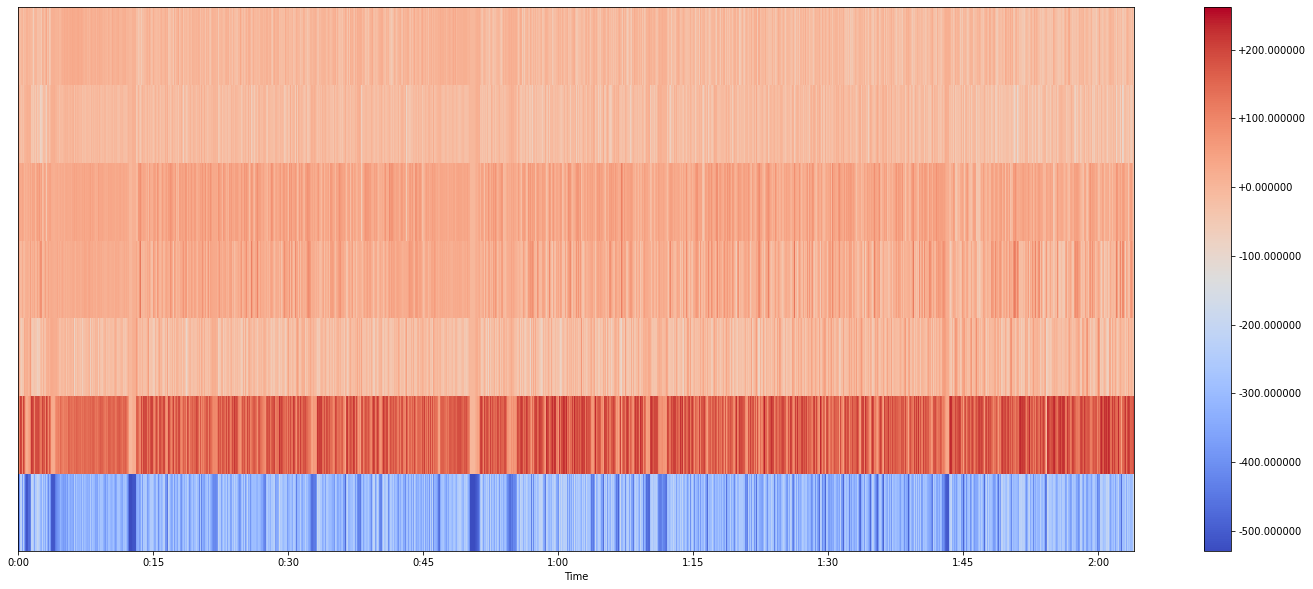

In [34]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc,x_axis='time',sr=sr)
plt.colorbar(format="%+2f")
plt.show()

In [35]:
## calculating first and second derivatives of MFCC,it helps us in telling how mfcc change over time in audio files
delta_mfcc = librosa.feature.delta(mfcc)

In [36]:
delta2_mfcc = librosa.feature.delta(mfcc, order=2) ## second derivative

In [37]:
delta_mfcc.shape

(7, 5342)

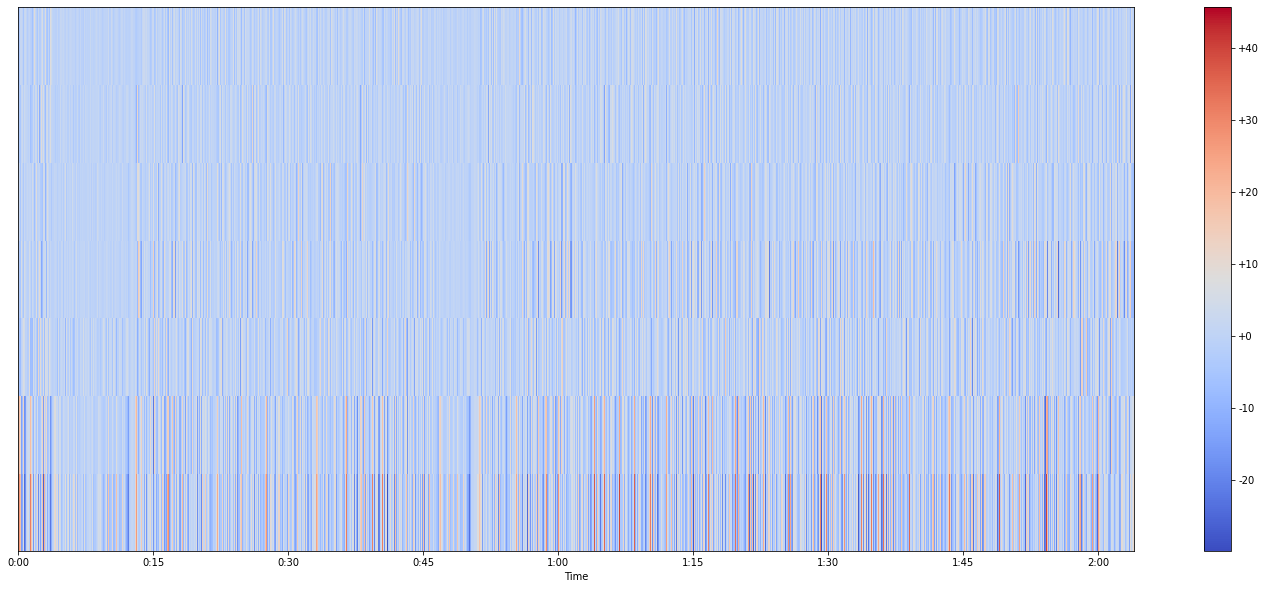

In [38]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfcc, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

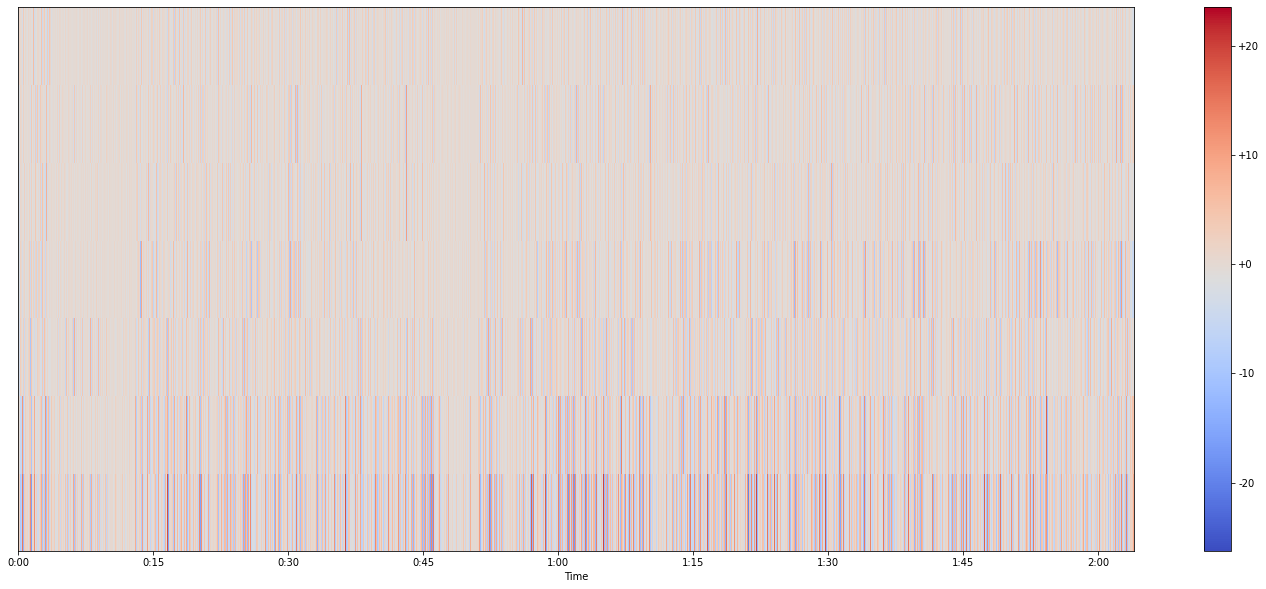

In [39]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfcc, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


In [40]:
mfccs_features = np.concatenate((mfcc, delta_mfcc, delta2_mfcc))

In [42]:
mfccs_features.shape

(21, 5342)

In [44]:
mfccs_features

array([[-5.2909784e+02, -5.1251270e+02, -5.0193246e+02, ...,
        -2.6161456e+02, -2.2584320e+02, -1.7897252e+02],
       [ 0.0000000e+00,  2.1549030e+01,  3.3916107e+01, ...,
         2.0050677e+02,  2.3456679e+02,  1.9956146e+02],
       [ 0.0000000e+00,  1.7504282e+01,  2.4963976e+01, ...,
        -1.6392654e+01, -2.5935732e+01, -2.9425552e+01],
       ...,
       [-1.0199377e-01, -1.0199377e-01, -1.0199377e-01, ...,
        -1.7684698e+00, -1.7684698e+00, -1.7684698e+00],
       [-1.7940469e+00, -1.7940469e+00, -1.7940469e+00, ...,
         2.4985480e+00,  2.4985480e+00,  2.4985480e+00],
       [-2.7040455e+00, -2.7040455e+00, -2.7040455e+00, ...,
        -2.9566808e+00, -2.9566808e+00, -2.9566808e+00]], dtype=float32)